In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
i = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.LSTM(128)(i)
x = tf.keras.layers.Dense(10, activation = 'softmax')(x)
model = tf.keras.models.Model(i,x)

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
r = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.5069 - accuracy: 0.8299 - val_loss: 0.3426 - val_accuracy: 0.8840
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3050 - accuracy: 0.8977 - val_loss: 0.2793 - val_accuracy: 0.9055
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2533 - accuracy: 0.9147 - val_loss: 0.2534 - val_accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2254 - accuracy: 0.9240 - val_loss: 0.2377 - val_accuracy: 0.9203
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2039 - accuracy: 0.9323 - val_loss: 0.2162 - val_accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1869 - accuracy: 0.9364 - val_loss: 0.2115 - val_accuracy: 0.9292
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1772 - accuracy: 0.9406 - val_loss: 0.2044 -

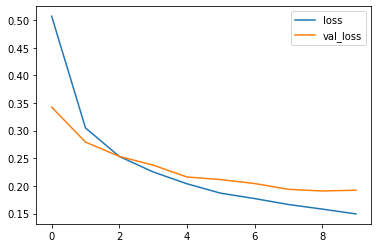

In [18]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

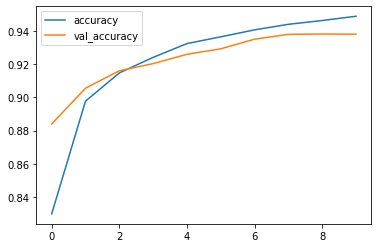

In [19]:
plt.plot(r.history['accuracy'], label = "accuracy")
plt.plot(r.history['val_accuracy'], label = "val_accuracy")
plt.legend()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(x_test).argmax(axis=1)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 967    0    0    0    0    4    3    0    4    2]
 [   0 1121    2    1    4    1    4    1    0    1]
 [   5    4  972   13    3    5    9    9    8    4]
 [   0    0   14  951    0   27    0    5    4    9]
 [   0    3    4    0  895    0    2    7    3   68]
 [   2    0    0   48    1  823    4    0    5    9]
 [   4    2    5    1    0    4  938    0    4    0]
 [   0   14    9    5   24    4    1  913    0   58]
 [  50    0    3    2    3   14   14    3  875   10]
 [   1    5    3   15   32    2    0   23    3  925]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.92      0.94      0.93      1010
           4       0.93      0.91      0.92       982
           5       0.93      0.92      0.93       892
           6       0.96      0.98      0.97       958
           7       0.95      0.89   

Text(0.5, 1.0, 'True label 4, Predicted Label 9')

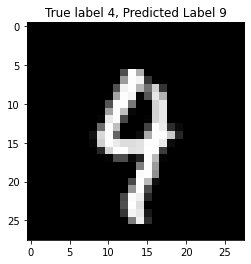

In [28]:
#portraying a random misclassified image
misclassified_indexes = np.where(y_test!=predictions)[0]
i = np.random.choice(misclassified_indexes)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f'True label {y_test[i]}, Predicted Label {predictions[i]}')